In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

GETTING THE WHOLE DATASET

In [2]:
df = pd.read_csv('./WDI_csv/WDIData.csv');

GETTING THE COUNTRIES DATA TO FILTER THE UNWANTED REGIONS(ARAB WORLD, CARRIBBEAN SMALL STATES ETC)

In [3]:
countries_df = pd.read_csv('./WDI_csv/WDICountry.csv');
countries_df.dropna(subset=['Currency Unit' , '2-alpha code', 'WB-2 code'], inplace= True);
countries_df = countries_df[['Country Code', 'Table Name']]

Function to get rid of unwanted countries

In [4]:
def df_by_indicator(indicator):
    return df[ (df['Indicator Code'] == indicator) & (df['Country Code'].isin(countries_df['Country Code']))]

FILTERING THE DATASET FOR POPULATION

In [5]:
df_pop = df_by_indicator('SP.POP.GROW')
df_pop.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Unnamed: 62
76336,Afghanistan,AFG,Population growth (annual %),SP.POP.GROW,1.816077,1.876528,1.934999,1.992521,2.049423,2.105369,...,2.569114,2.812617,3.095119,3.272703,3.315224,3.183201,2.943234,2.689163,2.490790,NaN
77936,Albania,ALB,Population growth (annual %),SP.POP.GROW,3.015423,3.120855,3.056731,2.953749,2.880686,2.754021,...,-0.673894,-0.496462,-0.269017,-0.165151,-0.183211,-0.207047,-0.291206,-0.159880,-0.091972,NaN
79536,Algeria,DZA,Population growth (annual %),SP.POP.GROW,2.511434,2.485473,2.470737,2.492035,2.560435,2.656201,...,1.720717,1.821358,1.924787,2.006614,2.036092,2.000666,1.919959,1.825463,1.738456,NaN
81136,American Samoa,ASM,Population growth (annual %),SP.POP.GROW,1.403903,2.335966,3.033668,3.558598,3.661243,3.557431,...,-1.418038,-1.054862,-0.571394,-0.162822,0.139320,0.234776,0.180222,0.111575,0.075512,NaN
82736,Andorra,AND,Population growth (annual %),SP.POP.GROW,7.050663,6.941532,6.692697,6.559522,6.241511,5.998800,...,0.714106,-0.015393,-0.829969,-1.588653,-2.013314,-1.956178,-1.537836,-0.944017,-0.409736,NaN


FILTERING THE DATASET FOR GDP

In [6]:
df_gdp = df_by_indicator('NY.GDP.MKTP.KD.ZG')
df_gdp

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Unnamed: 62
75728,Afghanistan,AFG,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,21.020649,8.433290,6.113685,14.434741,3.900575,2.690522,1.310040,2.366712,2.595542,NaN
77328,Albania,ALB,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,3.352610,3.710058,2.550161,1.419968,1.000755,1.774369,2.218752,3.352159,3.841364,NaN
78928,Algeria,DZA,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,-13.605441,-19.685042,34.313729,5.839413,6.206898,...,1.632244,3.634145,2.891866,3.374769,2.767639,3.789121,3.763467,3.300000,1.700000,NaN
80528,American Samoa,ASM,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,-4.237288,0.442478,0.293686,-4.392387,-2.756508,0.944882,1.248050,-2.619414,NaN,NaN
82128,Andorra,AND,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,-3.690654,-5.358826,-4.646543,-1.615218,0.351645,2.277683,0.842204,1.889124,1.873197,NaN
83728,Angola,AGO,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,2.412910,3.452875,3.873331,5.177594,6.842717,4.703971,2.999747,-0.813494,0.721699,NaN
85328,Antigua and Barbuda,ATG,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,-12.107536,-7.200024,-2.079127,3.506609,-0.103939,5.101940,4.060219,5.342479,3.337049,NaN
86928,Argentina,ARG,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,5.427843,-0.852022,-5.308197,10.130298,10.569433,...,-5.918525,10.125398,6.003952,-1.026420,2.405324,-2.512615,2.731160,-1.822542,2.863923,NaN
88528,Armenia,ARM,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,-14.149989,2.200000,4.700000,7.200000,3.300000,3.600000,3.200000,0.200000,7.500000,NaN
90128,Aruba,ABW,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,-5.653502,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
len(df_pop)

215

In [8]:
df_gni = df_by_indicator('NY.GNP.PCAP.PP.CD')
low_income_countries = df_gni[df_gni['2017'] < 1005]
high_income_countries = df_gni[df_gni['2017'] > 12235]
df_gni

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Unnamed: 62
75761,Afghanistan,AFG,"GNI per capita, PPP (current international $)",NY.GNP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1490.0,1590.0,1680.0,1900.0,1940.0,1950.0,1940.0,1970.0,2000.0,NaN
77361,Albania,ALB,"GNI per capita, PPP (current international $)",NY.GNP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,8670.0,9540.0,10210.0,10450.0,10750.0,11360.0,11470.0,11750.0,12120.0,NaN
78961,Algeria,DZA,"GNI per capita, PPP (current international $)",NY.GNP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,12130.0,12580.0,12850.0,13160.0,13420.0,13900.0,14220.0,14870.0,15050.0,NaN
80561,American Samoa,ASM,"GNI per capita, PPP (current international $)",NY.GNP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
82161,Andorra,AND,"GNI per capita, PPP (current international $)",NY.GNP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
83761,Angola,AGO,"GNI per capita, PPP (current international $)",NY.GNP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,5200.0,5210.0,5360.0,5550.0,5900.0,6130.0,6250.0,6090.0,6060.0,NaN
85361,Antigua and Barbuda,ATG,"GNI per capita, PPP (current international $)",NY.GNP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,19430.0,18310.0,17960.0,18580.0,18980.0,20040.0,20970.0,22090.0,22980.0,NaN
86961,Argentina,ARG,"GNI per capita, PPP (current international $)",NY.GNP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,16110.0,17710.0,19070.0,19120.0,19730.0,19400.0,19630.0,19260.0,20270.0,NaN
88561,Armenia,ARM,"GNI per capita, PPP (current international $)",NY.GNP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,6590.0,6890.0,7270.0,7950.0,8490.0,8790.0,9090.0,9020.0,10060.0,NaN
90161,Aruba,ABW,"GNI per capita, PPP (current international $)",NY.GNP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
#low_income_countries
Lname = low_income_countries["Country Name"]
Lname

125361                     Burundi
134961    Central African Republic
146161            Congo, Dem. Rep.
254961                     Liberia
306161                       Niger
Name: Country Name, dtype: object

In [10]:
Lgni = low_income_countries["2017"]
Lgni

125361    770.0
134961    730.0
146161    870.0
254961    710.0
306161    990.0
Name: 2017, dtype: float64

In [11]:
low_income_countries

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Unnamed: 62
125361,Burundi,BDI,"GNI per capita, PPP (current international $)",NY.GNP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,730.0,740.0,770.0,790.0,820.0,840.0,800.0,780.0,770.0,NaN
134961,Central African Republic,CAF,"GNI per capita, PPP (current international $)",NY.GNP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,830.0,870.0,910.0,960.0,620.0,630.0,660.0,690.0,730.0,NaN
146161,"Congo, Dem. Rep.",COD,"GNI per capita, PPP (current international $)",NY.GNP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,590.0,620.0,650.0,680.0,700.0,760.0,800.0,850.0,870.0,NaN
254961,Liberia,LBR,"GNI per capita, PPP (current international $)",NY.GNP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,580.0,590.0,680.0,670.0,720.0,710.0,720.0,700.0,710.0,NaN
306161,Niger,NER,"GNI per capita, PPP (current international $)",NY.GNP.PCAP.PP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,750.0,790.0,800.0,860.0,880.0,940.0,950.0,970.0,990.0,NaN


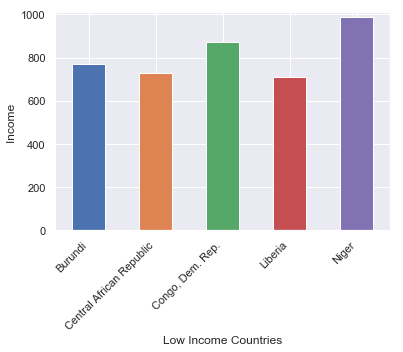

In [12]:
sns.set()
fig = low_income_countries["2017"].plot(kind='bar')
plt.margins(0.02)
plt.ylabel('Income ')
plt.xlabel('Low Income Countries')
fig.set_xticklabels(low_income_countries["Country Name"], rotation = 45, ha="right")
plt.show()

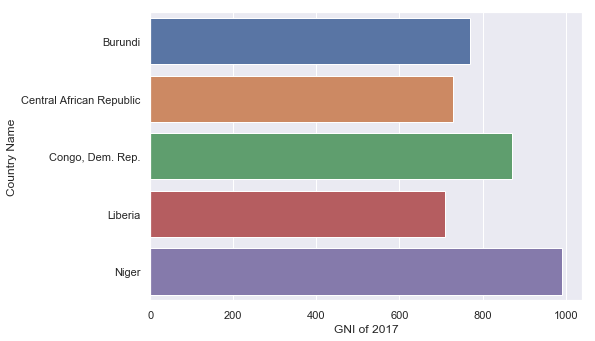

In [13]:
fig = plt.figure()
axes = fig.add_axes([0,0,1,1]);

g = sns.barplot(x='2017',y='Country Name', data=low_income_countries, ax=axes)
axes.set_xlabel("GNI of 2017")
plt.show()

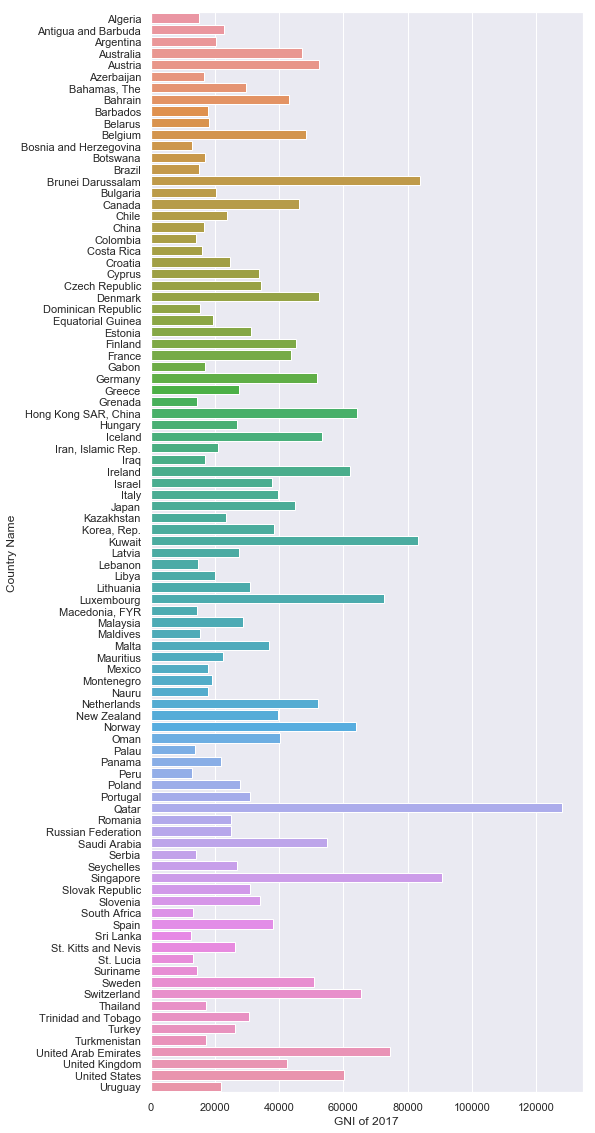

In [14]:
fig = plt.figure()
axes = fig.add_axes([0,0,1,1]);
fig.set_figheight(15);
g = sns.barplot(x='2017',y='Country Name', data=high_income_countries, ax=axes)
axes.set_xlabel("GNI of 2017")
plt.show()

In [15]:
tot_pop = df_by_indicator('SP.POP.TOTL')
tot_pop

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Unnamed: 62
76347,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,9938414.0,...,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032.0,35530081.0,NaN
77947,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,...,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0,NaN
79547,Algeria,DZA,"Population, total",SP.POP.TOTL,11124888.0,11404859.0,11690153.0,11985136.0,12295970.0,12626952.0,...,35465760.0,36117637.0,36819558.0,37565847.0,38338562.0,39113313.0,39871528.0,40606052.0,41318142.0,NaN
81147,American Samoa,ASM,"Population, total",SP.POP.TOTL,20013.0,20486.0,21117.0,21882.0,22698.0,23520.0,...,56227.0,55637.0,55320.0,55230.0,55307.0,55437.0,55537.0,55599.0,55641.0,NaN
82747,Andorra,AND,"Population, total",SP.POP.TOTL,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,...,84462.0,84449.0,83751.0,82431.0,80788.0,79223.0,78014.0,77281.0,76965.0,NaN
84347,Angola,AGO,"Population, total",SP.POP.TOTL,5643182.0,5753024.0,5866061.0,5980417.0,6093321.0,6203299.0,...,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463.0,29784193.0,NaN
85947,Antigua and Barbuda,ATG,"Population, total",SP.POP.TOTL,55339.0,56144.0,57144.0,58294.0,59524.0,60781.0,...,93581.0,94661.0,95719.0,96777.0,97824.0,98875.0,99923.0,100963.0,102012.0,NaN
87547,Argentina,ARG,"Population, total",SP.POP.TOTL,20619075.0,20953077.0,21287682.0,21621840.0,21953929.0,22283390.0,...,40799407.0,41223889.0,41656879.0,42096739.0,42539925.0,42981515.0,43417765.0,43847430.0,44271041.0,NaN
89147,Armenia,ARM,"Population, total",SP.POP.TOTL,1874120.0,1941491.0,2009526.0,2077575.0,2144998.0,2211316.0,...,2888584.0,2877311.0,2875581.0,2881922.0,2893509.0,2906220.0,2916950.0,2924816.0,2930450.0,NaN
90747,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,...,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822.0,105264.0,NaN


# Per year Annual Population Growth in %

In [16]:
pop_growth=[]
Years = []
for i in range(1960,2018):
    pop_growth.append(df_pop[str(i)].sum() / 215)
    Years.append(i)


#Created two lists and then merging them and forming a table which has Years from 1960-2017 and their respective growth of population(%)

In [17]:
temp1 = pd.DataFrame(np.array(pop_growth))
temp2 = pd.DataFrame(np.array(Years))

frames = [temp2,temp1]

In [18]:
yearly_pop_g = pd.concat(frames,axis=1)
yearly_pop_g.columns = ['Year','Annual Population Growth (%)']
yearly_pop_g

,Year,Annual Population Growth (%)
0,1960,2.289695
1,1961,2.289440
2,1962,2.306250
3,1963,2.349341
4,1964,2.286629
5,1965,2.275585
6,1966,2.230938
7,1967,2.226453
8,1968,2.217280
9,1969,2.183382


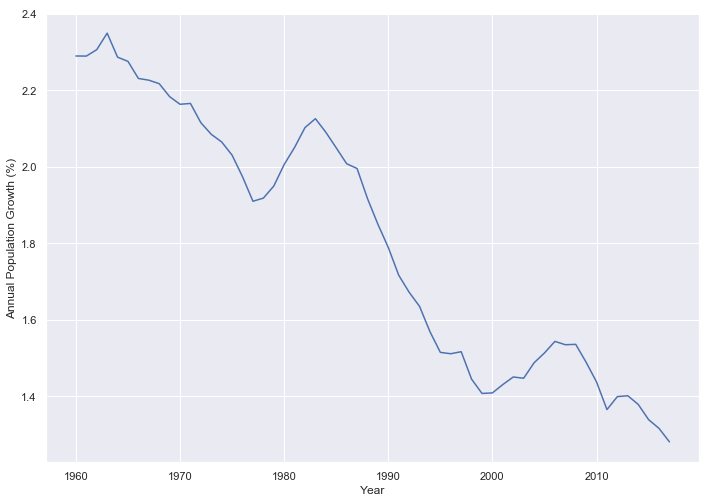

In [19]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
x = sns.lineplot(x="Year", y="Annual Population Growth (%)", data=yearly_pop_g, size_order=1)

## Plot Linear Regression Population Growth

/Users/nilesh.vijayrania/masters/Research-Methods/myvenv/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


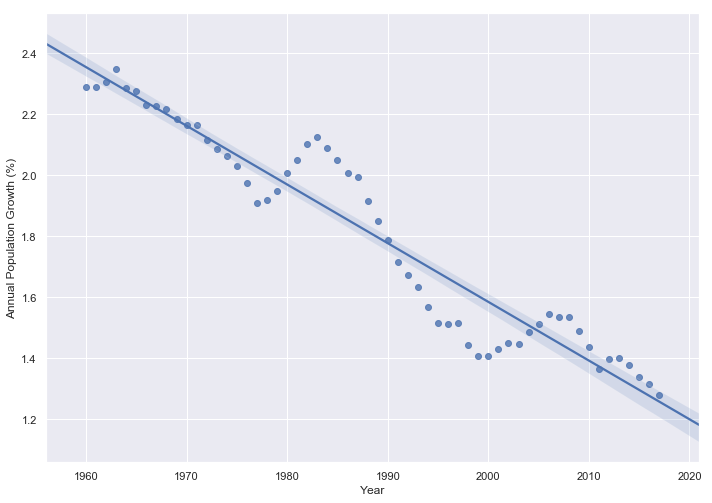

In [20]:
sns.regplot(x="Year", y="Annual Population Growth (%)", data=yearly_pop_g);

## Create Linear Regression Model

In [21]:
X = yearly_pop_g[['Year']]
y = yearly_pop_g['Annual Population Growth (%)']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/base.py:485: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

## 

In [31]:
y_prediction = lm.predict(X_test)
RMSE = np.mean((y_test - y_prediction)**2);
#Root mean squared error of our linear model is 0.01.
RMSE 

0.010109880150349861

In [33]:
R2_training = lm.score(X_test, y_test);
R2_test = lm.score(X_train, y_train);
[R2_training ,R2_test]

[0.9044178049386156, 0.9241128257501415]

Since the R2 value of the LM on test set and training set is ~ 90% which explains that the linear model explains the variability in population well.

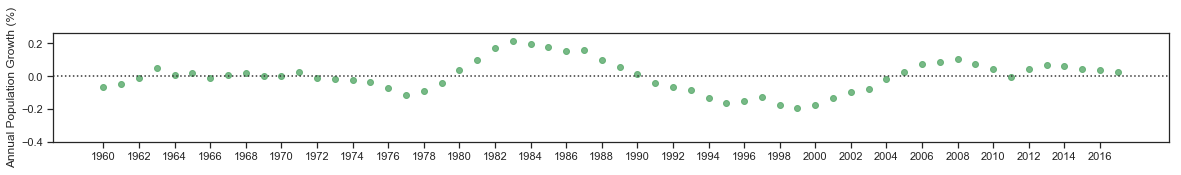

In [91]:
#plotting the residuals
plt.figure(figsize=(20,2))
fig = sns.residplot(x=  X.values, y=(y - lm.predict(X)), color="g")
plt.xticks(X.values[0::2])
plt.yticks(np.arange(-0.4, 0.4, 0.2))
plt.show(fig)

/Users/nilesh.vijayrania/masters/Research-Methods/myvenv/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


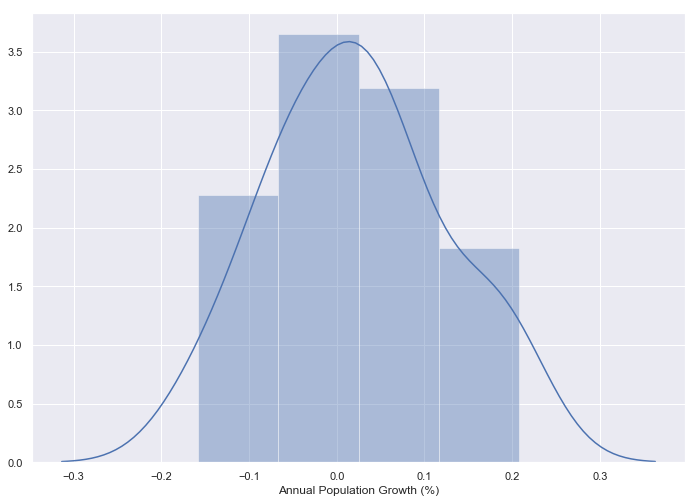

In [34]:
sns.distplot((y_test - y_prediction))


## Use model to predict up until year 2090 with 5 years interval

In [116]:
predict_years = np.arange(2020,2100)
prediction_pop_g = lm.predict(predict_years.reshape(-1,1))

predicted_df = pd.DataFrame({
    'Year': predict_years,
    'Predicted Pop Growth (%)': prediction_pop_g
})
predicted_df = predicted_df[predicted_df['Predicted Pop Growth (%)'] <0].reset_index();
predicted_df[2:3]

,index,Year,Predicted Pop Growth (%)
2,65,2085,-0.047376


As per the linear regression model , the population growth will be zero 